In [ ]:
!pip install wandb -qqq
import wandb

     |████████████████████████████████| 1.7 MB 6.9 MB/s 
     |████████████████████████████████| 181 kB 46.3 MB/s 
     |████████████████████████████████| 144 kB 10.2 MB/s 
     |████████████████████████████████| 63 kB 514 kB/s 


In [ ]:
# Log in to your W&B account
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import random

import numpy as np
import tensorflow as tf
from wandb.keras import WandbCallback

# Launch 20 experiments, trying different dropout rates
for run in range(20):
  # Start a run, tracking hyperparameters
  wandb.init(
      project="Assignment-4-weights and biases",
      # Set entity to specify your username or team name
      entity="nsp_team",
      config={
          "layer_1": 512,
          "activation_1": "relu",
          "dropout": random.uniform(0.01, 0.80),
          "layer_2": 10,
          "activation_2": "softmax",
          "optimizer": "sgd",
          "loss": "sparse_categorical_crossentropy",
          "metric": "accuracy",
          "epoch": 6,
          "batch_size": 256
      })
  config = wandb.config

  # Get the data
  mnist = tf.keras.datasets.mnist
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train, x_test = x_train / 255.0, x_test / 255.0
  x_train, y_train = x_train[::5], y_train[::5]  # Subset data for a faster demo
  x_test, y_test = x_test[::20], y_test[::20]
  labels = [str(digit) for digit in range(np.max(y_train) + 1)]

  # Build a model
  model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(config.layer_1, activation=config.activation_1),
      tf.keras.layers.Dropout(config.dropout),
      tf.keras.layers.Dense(config.layer_2, activation=config.activation_2)
      ])

  model.compile(optimizer=config.optimizer,
                loss=config.loss,
                metrics=[config.metric]
                )

  # WandbCallback auto-saves all metrics from model.fit(), plus predictions on validation_data
  logging_callback = WandbCallback(log_evaluation=True)

  history = model.fit(x=x_train, y=y_train,
                      epochs=config.epoch,
                      batch_size=config.batch_size,
                      validation_data=(x_test, y_test),
                      callbacks=[logging_callback]
                      )

  # Mark the run as finished
  wandb.finish()

wandb: Currently logged in as: nsp_team (use `wandb login --relogin` to force relogin)


11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/6
47/47 [==============================] - 1s 18ms/step - loss: 2.1077 - accuracy: 0.2758 - val_loss: 1.8248 - val_accuracy: 0.5640 - _timestamp: 1648492129.0000 - _runtime: 22.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.7056 - accuracy: 0.5289 - val_loss: 1.4864 - val_accuracy: 0.7260 - _timestamp: 1648492129.0000 - _runtime: 22.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.4316 - accuracy: 0.6392 - val_loss: 1.2414 - val_accuracy: 0.7540 - _timestamp: 1648492130.0000 - _runtime: 23.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.2178 - accuracy: 0.7067 - val_loss: 1.0643 - val_accuracy: 0.7700 - _timestamp: 1648492131.0000 - _runtime: 24.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.0757 - accuracy: 0.7385 - val_loss: 0.9378 - val_accuracy: 0.7820 - _timestamp: 1648492132.0000 - _ru

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▆▆▇▇█
val_loss,█▆▄▃▂▁
accuracy,0.75975
best_epoch,5
best_val_loss,0.84459
epoch,5
loss,0.9673
val_accuracy,0.808


Epoch 1/6
47/47 [==============================] - 1s 18ms/step - loss: 2.1237 - accuracy: 0.2975 - val_loss: 1.8679 - val_accuracy: 0.5480 - _timestamp: 1648492149.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 1s 15ms/step - loss: 1.6940 - accuracy: 0.5887 - val_loss: 1.5011 - val_accuracy: 0.6860 - _timestamp: 1648492150.0000 - _runtime: 8.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.3897 - accuracy: 0.6947 - val_loss: 1.2380 - val_accuracy: 0.7380 - _timestamp: 1648492150.0000 - _runtime: 8.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1701 - accuracy: 0.7478 - val_loss: 1.0538 - val_accuracy: 0.7840 - _timestamp: 1648492151.0000 - _runtime: 9.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.0104 - accuracy: 0.7846 - val_loss: 0.9230 - val_accuracy: 0.7980 - _timestamp: 1648492152.0000 - _runtime: 10.0000
Epoch 6/6
47/47 [==============================] - 1s 

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.80358
best_epoch,5
best_val_loss,0.82911
epoch,5
loss,0.90079
val_accuracy,0.816


Epoch 1/6
47/47 [==============================] - 1s 18ms/step - loss: 2.1227 - accuracy: 0.2594 - val_loss: 1.8723 - val_accuracy: 0.5380 - _timestamp: 1648492165.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 1s 15ms/step - loss: 1.7003 - accuracy: 0.5831 - val_loss: 1.5109 - val_accuracy: 0.6920 - _timestamp: 1648492166.0000 - _runtime: 8.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.3949 - accuracy: 0.6998 - val_loss: 1.2469 - val_accuracy: 0.7540 - _timestamp: 1648492166.0000 - _runtime: 8.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1782 - accuracy: 0.7492 - val_loss: 1.0599 - val_accuracy: 0.7880 - _timestamp: 1648492167.0000 - _runtime: 9.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.0171 - accuracy: 0.7817 - val_loss: 0.9266 - val_accuracy: 0.8120 - _timestamp: 1648492168.0000 - _runtime: 10.0000
Epoch 6/6
47/47 [==============================] - 1s 

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.80183
best_epoch,5
best_val_loss,0.83056
epoch,5
loss,0.90841
val_accuracy,0.818


Epoch 1/6
47/47 [==============================] - 1s 18ms/step - loss: 2.2471 - accuracy: 0.1920 - val_loss: 1.8745 - val_accuracy: 0.5780 - _timestamp: 1648492182.0000 - _runtime: 6.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.8218 - accuracy: 0.4220 - val_loss: 1.5424 - val_accuracy: 0.7160 - _timestamp: 1648492183.0000 - _runtime: 7.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.5435 - accuracy: 0.5530 - val_loss: 1.3001 - val_accuracy: 0.7580 - _timestamp: 1648492183.0000 - _runtime: 7.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.3576 - accuracy: 0.6154 - val_loss: 1.1254 - val_accuracy: 0.7700 - _timestamp: 1648492184.0000 - _runtime: 8.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.2089 - accuracy: 0.6588 - val_loss: 0.9947 - val_accuracy: 0.7820 - _timestamp: 1648492185.0000 - _runtime: 9.0000
Epoch 6/6
47/47 [==============================] - 1s 1

accuracy,▁▄▆▇██
epoch,▁▂▄▅▇█
loss,█▅▄▃▂▁
val_accuracy,▁▅▇▇▇█
val_loss,█▆▄▃▂▁
accuracy,0.68833
best_epoch,5
best_val_loss,0.89591
epoch,5
loss,1.09995
val_accuracy,0.806


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.1388 - accuracy: 0.2545 - val_loss: 1.8707 - val_accuracy: 0.6080 - _timestamp: 1648492197.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 1s 15ms/step - loss: 1.7355 - accuracy: 0.5404 - val_loss: 1.5240 - val_accuracy: 0.7260 - _timestamp: 1648492198.0000 - _runtime: 8.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.4441 - accuracy: 0.6649 - val_loss: 1.2654 - val_accuracy: 0.7640 - _timestamp: 1648492198.0000 - _runtime: 8.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.2286 - accuracy: 0.7185 - val_loss: 1.0787 - val_accuracy: 0.7920 - _timestamp: 1648492199.0000 - _runtime: 9.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.0702 - accuracy: 0.7545 - val_loss: 0.9442 - val_accuracy: 0.8040 - _timestamp: 1648492200.0000 - _runtime: 10.0000
Epoch 6/6
47/47 [==============================] - 1s 

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.77408
best_epoch,5
best_val_loss,0.84718
epoch,5
loss,0.95872
val_accuracy,0.81


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.1769 - accuracy: 0.2066 - val_loss: 1.8644 - val_accuracy: 0.5840 - _timestamp: 1648492212.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 1s 15ms/step - loss: 1.7697 - accuracy: 0.4550 - val_loss: 1.5228 - val_accuracy: 0.7520 - _timestamp: 1648492213.0000 - _runtime: 8.0000
Epoch 3/6
47/47 [==============================] - 1s 15ms/step - loss: 1.4865 - accuracy: 0.6046 - val_loss: 1.2723 - val_accuracy: 0.8000 - _timestamp: 1648492214.0000 - _runtime: 9.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.2846 - accuracy: 0.6677 - val_loss: 1.0921 - val_accuracy: 0.8060 - _timestamp: 1648492214.0000 - _runtime: 9.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1335 - accuracy: 0.7057 - val_loss: 0.9599 - val_accuracy: 0.8240 - _timestamp: 1648492215.0000 - _runtime: 10.0000
Epoch 6/6
47/47 [==============================] - 1s 

accuracy,▁▄▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▆▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.73433
best_epoch,5
best_val_loss,0.86227
epoch,5
loss,1.02207
val_accuracy,0.83


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.1096 - accuracy: 0.3025 - val_loss: 1.8303 - val_accuracy: 0.6100 - _timestamp: 1648492235.0000 - _runtime: 8.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.6750 - accuracy: 0.6104 - val_loss: 1.4666 - val_accuracy: 0.7160 - _timestamp: 1648492236.0000 - _runtime: 9.0000
Epoch 3/6
47/47 [==============================] - 1s 15ms/step - loss: 1.3698 - accuracy: 0.7163 - val_loss: 1.2099 - val_accuracy: 0.7700 - _timestamp: 1648492236.0000 - _runtime: 9.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1535 - accuracy: 0.7603 - val_loss: 1.0317 - val_accuracy: 0.7920 - _timestamp: 1648492237.0000 - _runtime: 10.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.0007 - accuracy: 0.7848 - val_loss: 0.9064 - val_accuracy: 0.8060 - _timestamp: 1648492238.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 1s

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▅▄▂▂▁
accuracy,0.80375
best_epoch,5
best_val_loss,0.81483
epoch,5
loss,0.89243
val_accuracy,0.818


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.1480 - accuracy: 0.2519 - val_loss: 1.8672 - val_accuracy: 0.5760 - _timestamp: 1648492250.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 1s 15ms/step - loss: 1.7476 - accuracy: 0.5167 - val_loss: 1.5332 - val_accuracy: 0.6960 - _timestamp: 1648492251.0000 - _runtime: 8.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.4671 - accuracy: 0.6422 - val_loss: 1.2829 - val_accuracy: 0.7500 - _timestamp: 1648492251.0000 - _runtime: 8.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.2544 - accuracy: 0.6968 - val_loss: 1.0988 - val_accuracy: 0.7700 - _timestamp: 1648492252.0000 - _runtime: 9.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1027 - accuracy: 0.7328 - val_loss: 0.9658 - val_accuracy: 0.7880 - _timestamp: 1648492253.0000 - _runtime: 10.0000
Epoch 6/6
47/47 [==============================] - 1s 

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.76042
best_epoch,5
best_val_loss,0.86606
epoch,5
loss,0.98857
val_accuracy,0.796


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.1954 - accuracy: 0.2054 - val_loss: 1.8935 - val_accuracy: 0.5560 - _timestamp: 1648492266.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 1s 15ms/step - loss: 1.7848 - accuracy: 0.4690 - val_loss: 1.5457 - val_accuracy: 0.7360 - _timestamp: 1648492266.0000 - _runtime: 7.0000
Epoch 3/6
47/47 [==============================] - 1s 15ms/step - loss: 1.4965 - accuracy: 0.6118 - val_loss: 1.2847 - val_accuracy: 0.7780 - _timestamp: 1648492267.0000 - _runtime: 8.0000
Epoch 4/6
47/47 [==============================] - 1s 15ms/step - loss: 1.2828 - accuracy: 0.6796 - val_loss: 1.0977 - val_accuracy: 0.7920 - _timestamp: 1648492268.0000 - _runtime: 9.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1183 - accuracy: 0.7220 - val_loss: 0.9604 - val_accuracy: 0.7940 - _timestamp: 1648492269.0000 - _runtime: 10.0000
Epoch 6/6
47/47 [==============================] - 1s 

accuracy,▁▄▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▆▇███
val_loss,█▆▄▃▂▁
accuracy,0.74542
best_epoch,5
best_val_loss,0.8624
epoch,5
loss,1.00636
val_accuracy,0.804


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.1785 - accuracy: 0.2371 - val_loss: 1.9148 - val_accuracy: 0.5080 - _timestamp: 1648492283.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.7651 - accuracy: 0.5269 - val_loss: 1.5606 - val_accuracy: 0.6860 - _timestamp: 1648492284.0000 - _runtime: 8.0000
Epoch 3/6
47/47 [==============================] - 1s 15ms/step - loss: 1.4613 - accuracy: 0.6532 - val_loss: 1.2972 - val_accuracy: 0.7400 - _timestamp: 1648492285.0000 - _runtime: 9.0000
Epoch 4/6
47/47 [==============================] - 1s 15ms/step - loss: 1.2419 - accuracy: 0.7108 - val_loss: 1.1048 - val_accuracy: 0.7780 - _timestamp: 1648492285.0000 - _runtime: 9.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.0795 - accuracy: 0.7487 - val_loss: 0.9671 - val_accuracy: 0.7900 - _timestamp: 1648492286.0000 - _runtime: 10.0000
Epoch 6/6
47/47 [==============================] - 1s 

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.76958
best_epoch,5
best_val_loss,0.86449
epoch,5
loss,0.96617
val_accuracy,0.8


Epoch 1/6
47/47 [==============================] - 1s 18ms/step - loss: 2.1064 - accuracy: 0.2882 - val_loss: 1.8730 - val_accuracy: 0.5600 - _timestamp: 1648492300.0000 - _runtime: 8.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.6831 - accuracy: 0.6135 - val_loss: 1.5125 - val_accuracy: 0.7100 - _timestamp: 1648492301.0000 - _runtime: 9.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.3804 - accuracy: 0.7189 - val_loss: 1.2501 - val_accuracy: 0.7640 - _timestamp: 1648492301.0000 - _runtime: 9.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1629 - accuracy: 0.7623 - val_loss: 1.0625 - val_accuracy: 0.7900 - _timestamp: 1648492302.0000 - _runtime: 10.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.0029 - accuracy: 0.7942 - val_loss: 0.9297 - val_accuracy: 0.8020 - _timestamp: 1648492303.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 1s

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.81033
best_epoch,5
best_val_loss,0.83198
epoch,5
loss,0.89109
val_accuracy,0.812


Epoch 1/6
47/47 [==============================] - 1s 18ms/step - loss: 2.1927 - accuracy: 0.2160 - val_loss: 1.8965 - val_accuracy: 0.5580 - _timestamp: 1648492320.0000 - _runtime: 6.0000
Epoch 2/6
47/47 [==============================] - 1s 15ms/step - loss: 1.7845 - accuracy: 0.4754 - val_loss: 1.5535 - val_accuracy: 0.6860 - _timestamp: 1648492321.0000 - _runtime: 7.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.5058 - accuracy: 0.5979 - val_loss: 1.2979 - val_accuracy: 0.7680 - _timestamp: 1648492321.0000 - _runtime: 7.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.2930 - accuracy: 0.6664 - val_loss: 1.1105 - val_accuracy: 0.7880 - _timestamp: 1648492322.0000 - _runtime: 8.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1359 - accuracy: 0.7054 - val_loss: 0.9737 - val_accuracy: 0.8000 - _timestamp: 1648492323.0000 - _runtime: 9.0000
Epoch 6/6
47/47 [==============================] - 1s 1

accuracy,▁▄▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.73558
best_epoch,5
best_val_loss,0.87344
epoch,5
loss,1.01932
val_accuracy,0.81


Epoch 1/6
47/47 [==============================] - 1s 18ms/step - loss: 2.2380 - accuracy: 0.1971 - val_loss: 1.8322 - val_accuracy: 0.5900 - _timestamp: 1648492341.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 1s 15ms/step - loss: 1.8176 - accuracy: 0.4027 - val_loss: 1.5096 - val_accuracy: 0.7000 - _timestamp: 1648492341.0000 - _runtime: 7.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.5547 - accuracy: 0.5296 - val_loss: 1.2790 - val_accuracy: 0.7560 - _timestamp: 1648492342.0000 - _runtime: 8.0000
Epoch 4/6
47/47 [==============================] - 1s 15ms/step - loss: 1.3624 - accuracy: 0.5962 - val_loss: 1.1112 - val_accuracy: 0.7740 - _timestamp: 1648492343.0000 - _runtime: 9.0000
Epoch 5/6
47/47 [==============================] - 1s 15ms/step - loss: 1.2190 - accuracy: 0.6488 - val_loss: 0.9862 - val_accuracy: 0.8000 - _timestamp: 1648492344.0000 - _runtime: 10.0000
Epoch 6/6
47/47 [==============================] - 1s 

accuracy,▁▄▆▇██
epoch,▁▂▄▅▇█
loss,█▅▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.67233
best_epoch,5
best_val_loss,0.89366
epoch,5
loss,1.12057
val_accuracy,0.81


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.2100 - accuracy: 0.1986 - val_loss: 1.8779 - val_accuracy: 0.5880 - _timestamp: 1648492358.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.8069 - accuracy: 0.4298 - val_loss: 1.5527 - val_accuracy: 0.7180 - _timestamp: 1648492359.0000 - _runtime: 8.0000
Epoch 3/6
47/47 [==============================] - 1s 15ms/step - loss: 1.5398 - accuracy: 0.5594 - val_loss: 1.3099 - val_accuracy: 0.7660 - _timestamp: 1648492360.0000 - _runtime: 9.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.3334 - accuracy: 0.6319 - val_loss: 1.1295 - val_accuracy: 0.7900 - _timestamp: 1648492361.0000 - _runtime: 10.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1927 - accuracy: 0.6712 - val_loss: 0.9970 - val_accuracy: 0.8080 - _timestamp: 1648492361.0000 - _runtime: 10.0000
Epoch 6/6
47/47 [==============================] - 1s

accuracy,▁▄▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.70483
best_epoch,5
best_val_loss,0.89661
epoch,5
loss,1.07399
val_accuracy,0.808


Epoch 1/6
47/47 [==============================] - 1s 18ms/step - loss: 2.1164 - accuracy: 0.2930 - val_loss: 1.8447 - val_accuracy: 0.5860 - _timestamp: 1648492376.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.6867 - accuracy: 0.6127 - val_loss: 1.4813 - val_accuracy: 0.7200 - _timestamp: 1648492377.0000 - _runtime: 8.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.3791 - accuracy: 0.7123 - val_loss: 1.2208 - val_accuracy: 0.7780 - _timestamp: 1648492377.0000 - _runtime: 8.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1590 - accuracy: 0.7578 - val_loss: 1.0384 - val_accuracy: 0.8140 - _timestamp: 1648492378.0000 - _runtime: 9.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.0084 - accuracy: 0.7864 - val_loss: 0.9100 - val_accuracy: 0.8220 - _timestamp: 1648492379.0000 - _runtime: 10.0000
Epoch 6/6
47/47 [==============================] - 1s 

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇███
val_loss,█▆▄▃▂▁
accuracy,0.80442
best_epoch,5
best_val_loss,0.81589
epoch,5
loss,0.89177
val_accuracy,0.828


Epoch 1/6
47/47 [==============================] - 1s 18ms/step - loss: 2.0928 - accuracy: 0.2868 - val_loss: 1.8301 - val_accuracy: 0.6040 - _timestamp: 1648492391.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 1s 15ms/step - loss: 1.7040 - accuracy: 0.5432 - val_loss: 1.4910 - val_accuracy: 0.7240 - _timestamp: 1648492391.0000 - _runtime: 7.0000
Epoch 3/6
47/47 [==============================] - 1s 15ms/step - loss: 1.4219 - accuracy: 0.6572 - val_loss: 1.2415 - val_accuracy: 0.7700 - _timestamp: 1648492392.0000 - _runtime: 8.0000
Epoch 4/6
47/47 [==============================] - 1s 15ms/step - loss: 1.2109 - accuracy: 0.7142 - val_loss: 1.0619 - val_accuracy: 0.7900 - _timestamp: 1648492393.0000 - _runtime: 9.0000
Epoch 5/6
47/47 [==============================] - 1s 15ms/step - loss: 1.0589 - accuracy: 0.7436 - val_loss: 0.9312 - val_accuracy: 0.8060 - _timestamp: 1648492394.0000 - _runtime: 10.0000
Epoch 6/6
47/47 [==============================] - 1s 

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.77067
best_epoch,5
best_val_loss,0.83609
epoch,5
loss,0.95545
val_accuracy,0.81


Epoch 1/6
47/47 [==============================] - 1s 18ms/step - loss: 2.1567 - accuracy: 0.2473 - val_loss: 1.8864 - val_accuracy: 0.5360 - _timestamp: 1648492408.0000 - _runtime: 8.0000
Epoch 2/6
47/47 [==============================] - 1s 15ms/step - loss: 1.7259 - accuracy: 0.5829 - val_loss: 1.5214 - val_accuracy: 0.7220 - _timestamp: 1648492409.0000 - _runtime: 9.0000
Epoch 3/6
47/47 [==============================] - 1s 15ms/step - loss: 1.4123 - accuracy: 0.6997 - val_loss: 1.2528 - val_accuracy: 0.7580 - _timestamp: 1648492409.0000 - _runtime: 9.0000
Epoch 4/6
47/47 [==============================] - 1s 15ms/step - loss: 1.1888 - accuracy: 0.7492 - val_loss: 1.0600 - val_accuracy: 0.7900 - _timestamp: 1648492410.0000 - _runtime: 10.0000
Epoch 5/6
47/47 [==============================] - 1s 15ms/step - loss: 1.0285 - accuracy: 0.7814 - val_loss: 0.9256 - val_accuracy: 0.8060 - _timestamp: 1648492411.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 1s

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▆▇███
val_loss,█▆▄▃▂▁
accuracy,0.7985
best_epoch,5
best_val_loss,0.82724
epoch,5
loss,0.90873
val_accuracy,0.808


Epoch 1/6
47/47 [==============================] - 1s 18ms/step - loss: 2.1110 - accuracy: 0.2739 - val_loss: 1.8395 - val_accuracy: 0.5560 - _timestamp: 1648492425.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.6989 - accuracy: 0.5544 - val_loss: 1.4895 - val_accuracy: 0.7140 - _timestamp: 1648492425.0000 - _runtime: 7.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.4027 - accuracy: 0.6695 - val_loss: 1.2348 - val_accuracy: 0.7780 - _timestamp: 1648492426.0000 - _runtime: 8.0000
Epoch 4/6
47/47 [==============================] - 1s 15ms/step - loss: 1.1937 - accuracy: 0.7214 - val_loss: 1.0535 - val_accuracy: 0.8000 - _timestamp: 1648492427.0000 - _runtime: 9.0000
Epoch 5/6
47/47 [==============================] - 1s 15ms/step - loss: 1.0406 - accuracy: 0.7599 - val_loss: 0.9247 - val_accuracy: 0.8080 - _timestamp: 1648492428.0000 - _runtime: 10.0000
Epoch 6/6
47/47 [==============================] - 1s 

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇███
val_loss,█▆▄▃▂▁
accuracy,0.77683
best_epoch,5
best_val_loss,0.83147
epoch,5
loss,0.93666
val_accuracy,0.816


Epoch 1/6
47/47 [==============================] - 1s 18ms/step - loss: 2.1049 - accuracy: 0.3056 - val_loss: 1.8637 - val_accuracy: 0.5600 - _timestamp: 1648492442.0000 - _runtime: 8.0000
Epoch 2/6
47/47 [==============================] - 1s 15ms/step - loss: 1.6933 - accuracy: 0.6195 - val_loss: 1.5076 - val_accuracy: 0.7580 - _timestamp: 1648492442.0000 - _runtime: 8.0000
Epoch 3/6
47/47 [==============================] - 1s 15ms/step - loss: 1.3922 - accuracy: 0.7270 - val_loss: 1.2390 - val_accuracy: 0.7920 - _timestamp: 1648492443.0000 - _runtime: 9.0000
Epoch 4/6
47/47 [==============================] - 1s 15ms/step - loss: 1.1675 - accuracy: 0.7712 - val_loss: 1.0475 - val_accuracy: 0.8200 - _timestamp: 1648492444.0000 - _runtime: 10.0000
Epoch 5/6
47/47 [==============================] - 1s 15ms/step - loss: 1.0081 - accuracy: 0.7993 - val_loss: 0.9124 - val_accuracy: 0.8300 - _timestamp: 1648492444.0000 - _runtime: 10.0000
Epoch 6/6
47/47 [==============================] - 1s

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▆▇███
val_loss,█▆▄▃▂▁
accuracy,0.81142
best_epoch,5
best_val_loss,0.81481
epoch,5
loss,0.89597
val_accuracy,0.836


Epoch 1/6
47/47 [==============================] - 1s 18ms/step - loss: 2.1249 - accuracy: 0.2856 - val_loss: 1.8766 - val_accuracy: 0.5620 - _timestamp: 1648492459.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 1s 15ms/step - loss: 1.7097 - accuracy: 0.6122 - val_loss: 1.5250 - val_accuracy: 0.7380 - _timestamp: 1648492459.0000 - _runtime: 7.0000
Epoch 3/6
47/47 [==============================] - 1s 16ms/step - loss: 1.4109 - accuracy: 0.7143 - val_loss: 1.2606 - val_accuracy: 0.7780 - _timestamp: 1648492460.0000 - _runtime: 8.0000
Epoch 4/6
47/47 [==============================] - 1s 15ms/step - loss: 1.1883 - accuracy: 0.7574 - val_loss: 1.0702 - val_accuracy: 0.7980 - _timestamp: 1648492461.0000 - _runtime: 9.0000
Epoch 5/6
47/47 [==============================] - 1s 15ms/step - loss: 1.0279 - accuracy: 0.7883 - val_loss: 0.9332 - val_accuracy: 0.8060 - _timestamp: 1648492462.0000 - _runtime: 10.0000
Epoch 6/6
47/47 [==============================] - 1s 

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▆▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.80583
best_epoch,5
best_val_loss,0.83448
epoch,5
loss,0.91033
val_accuracy,0.818


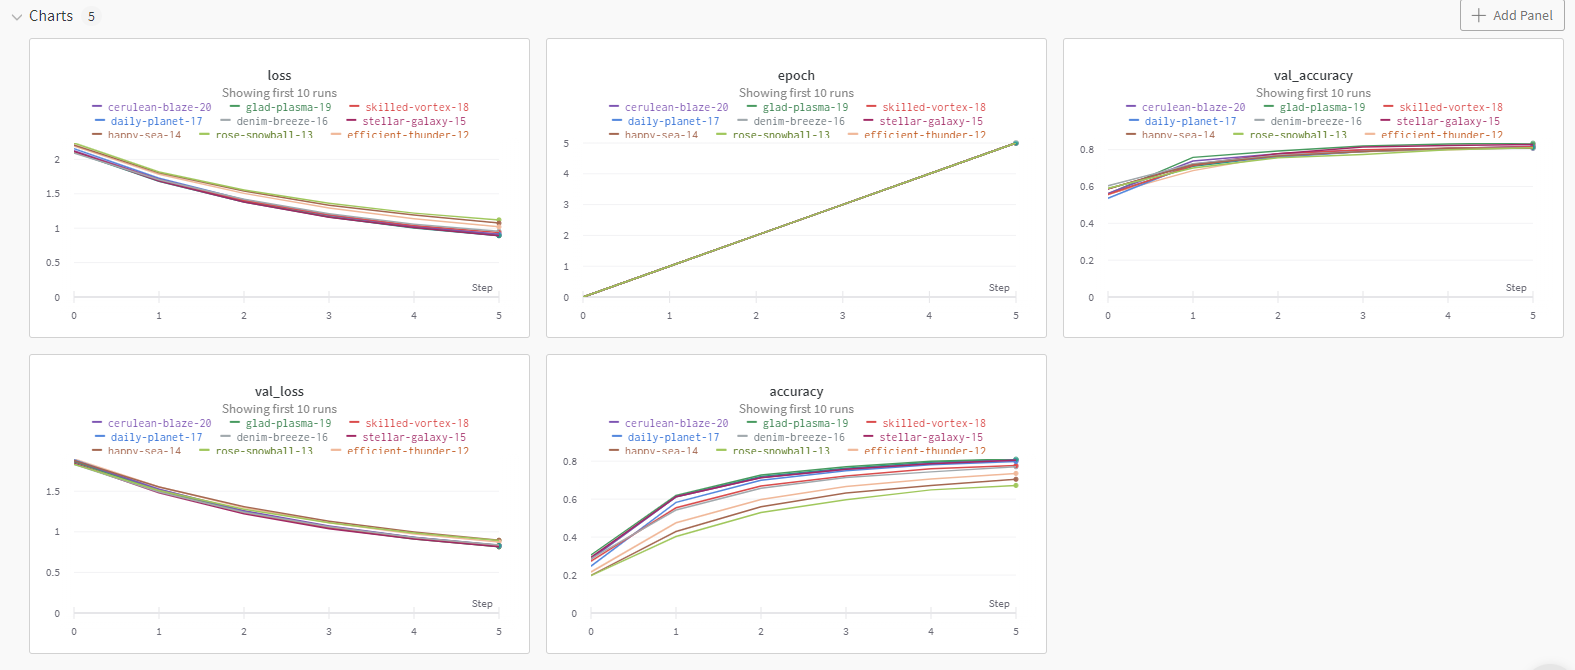

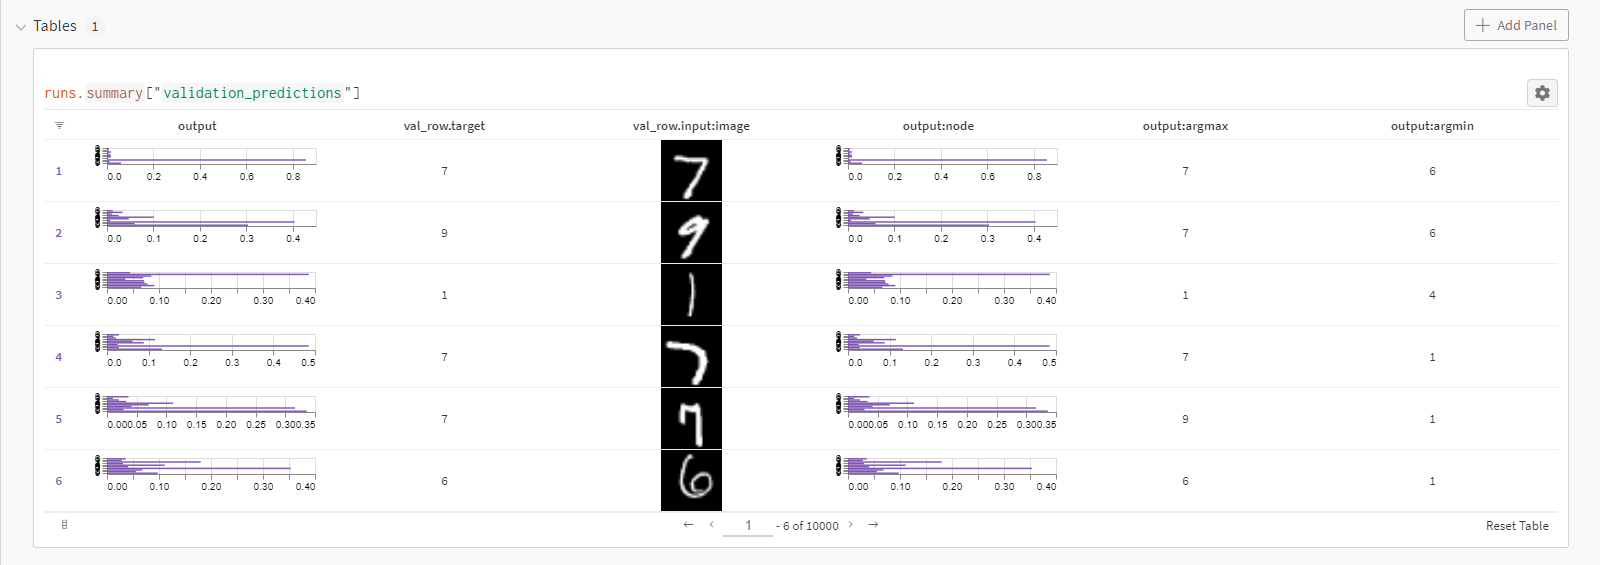